## Лабораторна робота 4

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<p>1. Завантажте вбудований датасет load_breast_cancer з бібліотеки
sklearn.datasets</p>

In [2]:
bc_dataset = load_breast_cancer()

<p>2. Проведіть попередній аналіз даних 
    <ul>
        <li>Перегляньте перші кілька рядків</li>
        <li>Перевірте назви стовпців та типи даних</li>
        <li>Перевірте наявність пропущених значень</li>
        <li>Досліджуйте розмір даних</li>
    </ul> 
    </p>/p>

In [3]:
df = pd.DataFrame(data=np.c_[bc_dataset.data, bc_dataset.target], columns=np.append(bc_dataset.feature_names, ['target']))
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [4]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [5]:
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [6]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [7]:
df.shape

(569, 31)

<p>3. Побудова і налаштування моделей
<ul>
    <li>Розділіть дані на навчальний і тестовий набори</li>
    <li>Побудуйте три моделі класифікації (на власний вибір), 
наприкла: Логістична регресія, Дерево рішень, Випадковий лісд</li>    <li>Підберіть оптимальні параметри для кожної моделі за допомогою 
GridSearchCV (можна вибрати інший оптимізатор)</li>

</u 

</p>

In [8]:
data = bc_dataset.data
target = bc_dataset.target
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
clf = LogisticRegression(random_state=0, max_iter=5000).fit(X_train_scaled, y_train)
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'penalty': ['l2']
}
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
print("Найкращі параметри: ", grid_search.best_params_)

best_lr_model = grid_search.best_estimator_

Найкращі параметри:  {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [10]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}
clf1 = RandomForestClassifier(random_state=0)
grid_search1 = GridSearchCV(estimator=clf1, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search1.fit(X_train_scaled, y_train)
print("Найкращі параметри:", grid_search1.best_params_)

best_rf_model = grid_search1.best_estimator_

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Найкращі параметри: {'max_depth': None, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 10}


In [11]:
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}
clf2 = DecisionTreeClassifier(random_state=0)
grid_search2 = GridSearchCV(estimator=clf2, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search2.fit(X_train_scaled, y_train)
print("Найкращі параметри:", grid_search2.best_params_)

best_dt_model = grid_search2.best_estimator_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Найкращі параметри: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


<p>4.Оцініть моделі. Виведіть точність (accuracy) – обов’язково, матрицю 
помилок (confusion matrix) – за вибором та звіт про класифікацію
(classification report) для кожної моделі.</p>

### Логістична регресія

In [12]:
y_pred = best_lr_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)
print("Точність на тестовому наборі: {:.4f}".format(test_accuracy))

Точність на тестовому наборі: 0.9912


Матриця помилок:
[[42  1]
 [ 0 71]]


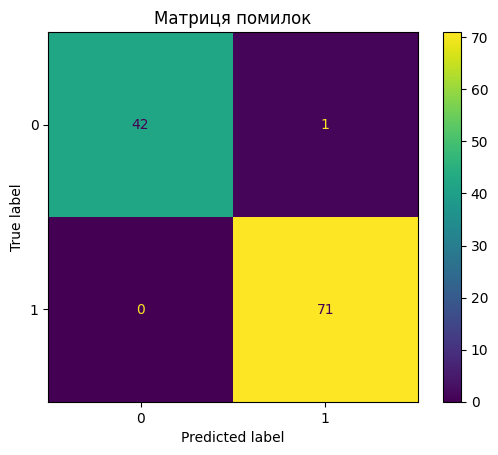

In [13]:
cm = confusion_matrix(y_test, y_pred)
print("Матриця помилок:")
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_lr_model.classes_)
disp.plot()
plt.title("Матриця помилок")
plt.show()

In [14]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1']))


Classification Report:
              precision    recall  f1-score   support

     class 0       1.00      0.98      0.99        43
     class 1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



### Дерево рішень

In [15]:
y_pred1 = best_dt_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred1)
print("Точність на тестовому наборі: {:.4f}".format(test_accuracy))

Точність на тестовому наборі: 0.9561


Матриця помилок:
[[39  4]
 [ 1 70]]


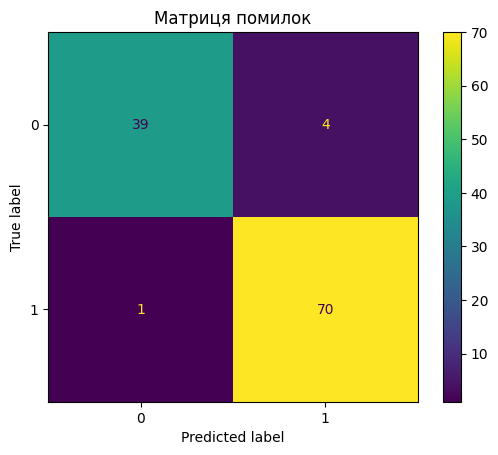

In [16]:
cm = confusion_matrix(y_test, y_pred1)
print("Матриця помилок:")
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_dt_model.classes_)
disp.plot()
plt.title("Матриця помилок")
plt.show()

In [17]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1']))


Classification Report:
              precision    recall  f1-score   support

     class 0       1.00      0.98      0.99        43
     class 1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



### Випадковий ліс

In [18]:
y_pred2 = best_rf_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred2)
print("Точність на тестовому наборі: {:.4f}".format(test_accuracy))

Точність на тестовому наборі: 0.9561


Матриця помилок:
[[39  4]
 [ 1 70]]


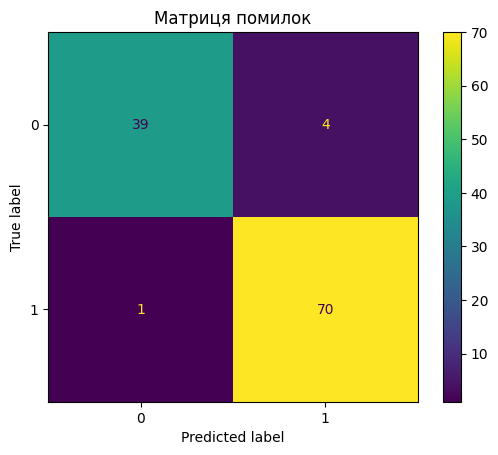

In [19]:
cm = confusion_matrix(y_test, y_pred2)
print("Матриця помилок:")
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf_model.classes_)
disp.plot()
plt.title("Матриця помилок")
plt.show()

In [20]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred2, target_names=['class 0', 'class 1']))


Classification Report:
              precision    recall  f1-score   support

     class 0       0.97      0.91      0.94        43
     class 1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



<p>4. Прогнозування і висновки 
    <ul>
        <li>Оберіть найкращу модель на основі метрик продуктивності</li>
        <li>Зробіть прогноз на тестовій вибірці</li>
        <li>Виведіть результати прогнозування</li>
    </ul>.
ня.</p>

<p>Висновки:
<ul>
    <li>Точність моделі логістичної регресії виявилась найвищою - 0.9912, тому для даної задачі ця модель підходить найбільше</li>
    <li>Рішення знайдені моделями дерево рішень та випадковий ліс виявились однаковими</li>
    <li>Прогнози для порівняння моделей були зроблені на тестовій вибірці</li>
</ul>
</p>

In [21]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [22]:
y_pred1

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [23]:
y_pred2

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

<p></p>

<p></p>

### Завдання 2

<p>Продовжуємо працювати з датасетом titanic.csv 
Завантажуємо, проводимо попередній аналіз даних (лр 2). 
Будуємо 3 класифікатори на вибір, визначаємо оптимальні параметри 
(оптимізатор – на вибір). Вибираємо найкращу модель. Виводимо 
характеристики, метрики. 
Робимо прогноз для 10 випадків.</p>

In [24]:
data = pd.read_csv('titanic.csv')
data = data.drop(['Cabin', 'Name'], axis=1)
dataset = data[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]
dataset = pd.get_dummies(dataset, columns=['Sex'], drop_first=True)
dataset.head()

,Survived,Pclass,Age,Fare,Sex_male
0,0,3,34.5,7.8292,True
1,1,3,47.0,7.0000,False
2,0,2,62.0,9.6875,True
3,0,3,27.0,8.6625,True
4,1,3,22.0,12.2875,False


In [25]:
dataset = dataset.fillna({'Age': dataset['Age'].mean(), 'Fare': dataset['Fare'].mean()})
dataset.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
Sex_male    0
dtype: int64

In [26]:
pd.set_option('future.no_silent_downcasting', True)
dataset = dataset.replace({'Sex_male': {True: 0, False: 1}})
dataset.head()

,Survived,Pclass,Age,Fare,Sex_male
0,0,3,34.5,7.8292,0
1,1,3,47.0,7.0000,1
2,0,2,62.0,9.6875,0
3,0,3,27.0,8.6625,0
4,1,3,22.0,12.2875,1


In [27]:
X = dataset.drop('Survived', axis=1)
y = dataset['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
dataset.dtypes

Survived      int64
Pclass        int64
Age         float64
Fare        float64
Sex_male     object
dtype: object

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<p>Перший класифікатор - Support Vector Machine</p>

In [38]:
parameters = {'kernel':('linear', 'rbf', 'sigmoid'), 'C':[1, 10]}

svc = svm.SVC(probability=True, random_state=42)
clf = GridSearchCV(svc, parameters)
clf.fit(X_train_scaled, y_train)
best_svc_model = clf.best_estimator_

<p>Другий класифікатор - Random Forest</p>

In [39]:
parameters = {'max_depth':[2, 5, 10, 20], 
              'n_estimators':[20, 50, 100], 
              'criterion':('gini', 'entropy'), 
              'bootstrap':[True, False]}

rf = RandomForestClassifier()
clf1 = GridSearchCV(rf, parameters)
clf1.fit(X_train_scaled, y_train)
best_rf_model = clf1.best_estimator_

<p>Третій класифікатор - K Nearest Neighbours</p>

In [40]:
parameters = {'n_neighbors' : [3, 5, 10], 
              'weights':('uniform', 'distance'), 
             'algorithm':('auto', 'ball_tree', 'kd_tree', 'brute')}

neigh = KNeighborsClassifier()
clf2 = GridSearchCV(neigh, parameters)
clf2.fit(X_train_scaled, y_train)
best_neigh_model = clf2.best_estimator_

<p><b>Прогнозуємо значення для всіх трьох класифікаторів та порівнюємо метрики</b></p>

In [41]:
y_pred1 = best_svc_model.predict(X_test_scaled)

print(f'\nMetrics for SVC model:\n')
print(f'Accuracy:{accuracy_score(y_test, y_pred1):.4f}')
print(f"Precision: {precision_score(y_test, y_pred1):.4f}")
print(f"Recall: {recall_score(y_test, y_pred1):.4f}")
print(confusion_matrix(y_test, y_pred1))


Metrics for SVC model:

Accuracy:1.0000
Precision: 1.0000
Recall: 1.0000
[[50  0]
 [ 0 34]]


In [42]:
y_pred2 = best_rf_model.predict(X_test_scaled)

print(f'\nMetrics for RandomForest model:\n')
print(f'Accuracy:{accuracy_score(y_test, y_pred2):.4f}')
print(f"Precision: {precision_score(y_test, y_pred2):.4f}")
print(f"Recall: {recall_score(y_test, y_pred2):.4f}")
print(confusion_matrix(y_test, y_pred2))


Metrics for RandomForest model:

Accuracy:1.0000
Precision: 1.0000
Recall: 1.0000
[[50  0]
 [ 0 34]]


In [43]:
y_pred3 = best_neigh_model.predict(X_test_scaled)

print(f'\nMetrics for RandomForest model:\n')
print(f'Accuracy:{accuracy_score(y_test, y_pred3):.4f}')
print(f"Precision: {precision_score(y_test, y_pred3):.4f}")
print(f"Recall: {recall_score(y_test, y_pred3):.4f}")
print(confusion_matrix(y_test, y_pred3))


Metrics for RandomForest model:

Accuracy:1.0000
Precision: 1.0000
Recall: 1.0000
[[50  0]
 [ 0 34]]


<p>Основні метрики трьох класифікаторів для даної задачі виявились однаковими, тому для прогнозування 10 випадків можна обрати будь яку модель. Обираєм SVC</p>

In [44]:
sample_10 = X_test_scaled[:10]
predictions = best_svc_model.predict(sample_10)
probabilities = best_svc_model.predict_proba(sample_10)[:, 1]

In [45]:
print("\nПрогноз для 10 випадків:")
for i, (pred, prob) in enumerate(zip(predictions, probabilities)):
    print(f"Випадок {i+1}: Прогноз - {'Вижив' if pred == 1 else 'Не вижив'}, Ймовірність виживання - {prob:.4f}")


Прогноз для 10 випадків:
Випадок 1: Прогноз - Не вижив, Ймовірність виживання - 0.0046
Випадок 2: Прогноз - Вижив, Ймовірність виживання - 0.9917
Випадок 3: Прогноз - Не вижив, Ймовірність виживання - 0.0046
Випадок 4: Прогноз - Не вижив, Ймовірність виживання - 0.0046
Випадок 5: Прогноз - Вижив, Ймовірність виживання - 0.9917
Випадок 6: Прогноз - Не вижив, Ймовірність виживання - 0.0046
Випадок 7: Прогноз - Вижив, Ймовірність виживання - 0.9917
Випадок 8: Прогноз - Не вижив, Ймовірність виживання - 0.0046
Випадок 9: Прогноз - Вижив, Ймовірність виживання - 0.9917
Випадок 10: Прогноз - Не вижив, Ймовірність виживання - 0.0046
